In [53]:
%matplotlib inline

import cv2
import display
import os

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [58]:
#visualize csv
class Visualizer:
    def __init__(self, path):
        self.vid_path = path
        
        self.csv_path = self.vid_path + ".csv"
        if not os.path.isfile(self.csv_path):
            raise Exception("no csv file")
        self.points = []
        with open(self.csv_path) as f:
            lines = f.readlines()
            lines = lines[9:]
            for line in lines:
                spl = line.split(',')
                self.points.append([int(spl[0]), [float(spl[1]), float(spl[2])]])
        print(len(self.points), 'points readed')
    
    def _plot(self, points):
        x = [p[1][0] for p in points]
        y = [p[1][1] for p in points]
        colors = [float(p[0]) / self.points[-1][0] for p in points]
        plt.scatter(x, y, c=colors, alpha=0.3, cmap='viridis')
        plt.colorbar()
        
    def plot_all(self):
        self._plot(self.points)
        self.xmin, self.xmax, self.ymin, self.ymax = plt.axis()
    
    def plot_interactive(self):
        @interact
        def show(i = (0, self.points[-1][0], 30), w = (30, self.points[-1][0], 10)):
            points = list(filter(lambda x : x[0] > i - w/2 and x[0] < i + w/2, self.points))
            self._plot(points)
            plt.xlim(self.xmin, self.xmax)
            plt.ylim(self.ymin, self.ymax)

1145 points readed


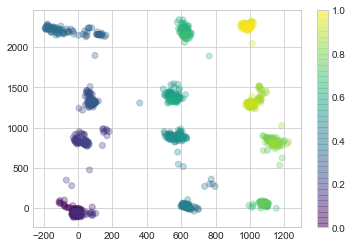

interactive(children=(IntSlider(value=570, description='i', max=1144, step=30), IntSlider(value=580, descripti…

In [59]:
calib_vid_path = "calib_run_example/NEURALACTION_20200227_13_29_04.mp4"
visualizer = Visualizer(calib_vid_path)
visualizer.plot_all()
visualizer.plot_interactive()

2914 points readed


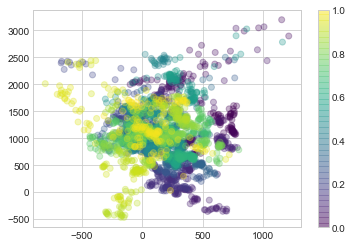

interactive(children=(IntSlider(value=1440, description='i', max=2928, step=30), IntSlider(value=1470, descrip…

In [50]:
test_vid_path = "calib_run_example/QVR_2020_02_27_13_25_46.mp4"
visualizer = Visualizer(test_vid_path)
visualizer.plot_all()
visualizer.plot_interactive()